In [1]:
# Import Library Utama
import pandas as pd
import numpy as np
import warnings
import os

# Import Library Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Import Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import Library Modeling + Evaluation
from tpot import TPOTClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

warnings.filterwarnings('ignore')
os.environ['OMP_NUM_THREADS'] = '1'

# Exploratory Data Analysis

1. Identifikasi Data <br>
    a. Informasi Data <br>
    b. Dimensi Data <br>
    c. Missing Values <br>
2. Univariate Analysis (Explore Kolom Target)
3. Bivariate Analysis
4. Multivariate Analysis

In [2]:
# Membaca dataset
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Identifikasi Data

In [3]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
# Melihat dimensi data
df.shape

(145460, 23)

In [5]:
# Melihat jumlah nilai null / missing values pada data
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Univariate Analysis
> Explore kolom target (RainTomorrow)
1. Check + Handling Missing Values
2. Check Unique Values
3. Check Distribusi Data

### Missing Values

In [6]:
# Melihat missing values pada data kolom target
print("Jumlah Missing Values Pada Kolom Target Rain Tomorrow =", df["RainTomorrow"].isnull().sum())

Jumlah Missing Values Pada Kolom Target Rain Tomorrow = 3267


In [7]:
# Handling missing values pada data kolom target
modus = df["RainTomorrow"].mode()
df["RainTomorrow"].fillna(modus[0], inplace=True)
print("Jumlah Missing Values Pada Kolom Target Rain Tomorrow =", df["RainTomorrow"].isnull().sum())

Jumlah Missing Values Pada Kolom Target Rain Tomorrow = 0


### Unique Values

In [8]:
# Melihat uniques values pada kolom target
print("Uniques Values Pada Kolom Target Rain Tomorrow =", df["RainTomorrow"].unique())

Uniques Values Pada Kolom Target Rain Tomorrow = ['No' 'Yes']


In [9]:
# Convert unique values ke binari 1 dan 0
df["RainTomorrow"].replace({'No': 0, 'Yes': 1},inplace = True)
print("Uniques Values Pada Kolom Target Rain Tomorrow =", df["RainTomorrow"].unique())

Uniques Values Pada Kolom Target Rain Tomorrow = [0 1]


### Distribusi Data

In [10]:
# Melihat distribusi data pada kolom target
df["RainTomorrow"].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

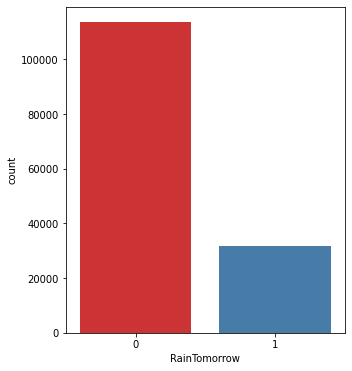

In [11]:
# Membuat visualisasi distribusi data pada kolom target
f, ax = plt.subplots(figsize=(5, 6))
ax = sns.countplot(x = "RainTomorrow", data = df, palette = "Set1")
plt.show()

## Bivariate Analysis

1. Datetime
2. Categorical
3. Numerical

In [12]:
# Melihat tipe data dari dataset
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow       int64
dtype: object

### Datetime

In [13]:
# Merubah type data date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# Convert date menjadi satuan tahun pada dataset
df['Tahun'] = df['Date'].dt.year
df['Tahun'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Tahun, dtype: int64

In [15]:
# Convert date menjadi satuan bulan pada dataset
df['Bulan'] = df['Date'].dt.month
df['Bulan'].head()

0    12
1    12
2    12
3    12
4    12
Name: Bulan, dtype: int64

In [16]:
# Convert date menjadi satuan hari pada dataset
df['Hari'] = df['Date'].dt.day
df['Hari'].head()

0    1
1    2
2    3
3    4
4    5
Name: Hari, dtype: int64

In [17]:
# Drop feature dari dataset
df.drop(['Date'], axis=1, inplace = True)

### Categorical

In [18]:
# Melihat data yang bertipe kategorical pada dataset
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('Terdapat {} categorical variables pada dataset\n'.format(len(categorical)))
print('Contohnya adalah :', categorical)

Terdapat 5 categorical variables pada dataset

Contohnya adalah : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### Numerical

In [19]:
# Melihat data yang bertipe numerical di data train salju
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('Terdapat {} numerical variables pada dataset\n'.format(len(numerical)))
print('Contohnya adalah :', numerical)

Terdapat 20 numerical variables pada dataset

Contohnya adalah : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow', 'Tahun', 'Bulan', 'Hari']


## Multivariate Analysis

1. Korelasi

In [20]:
korelasi = df.select_dtypes(include = ['float64']).iloc[:, :].corr()
korelasi

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


### Korelasi

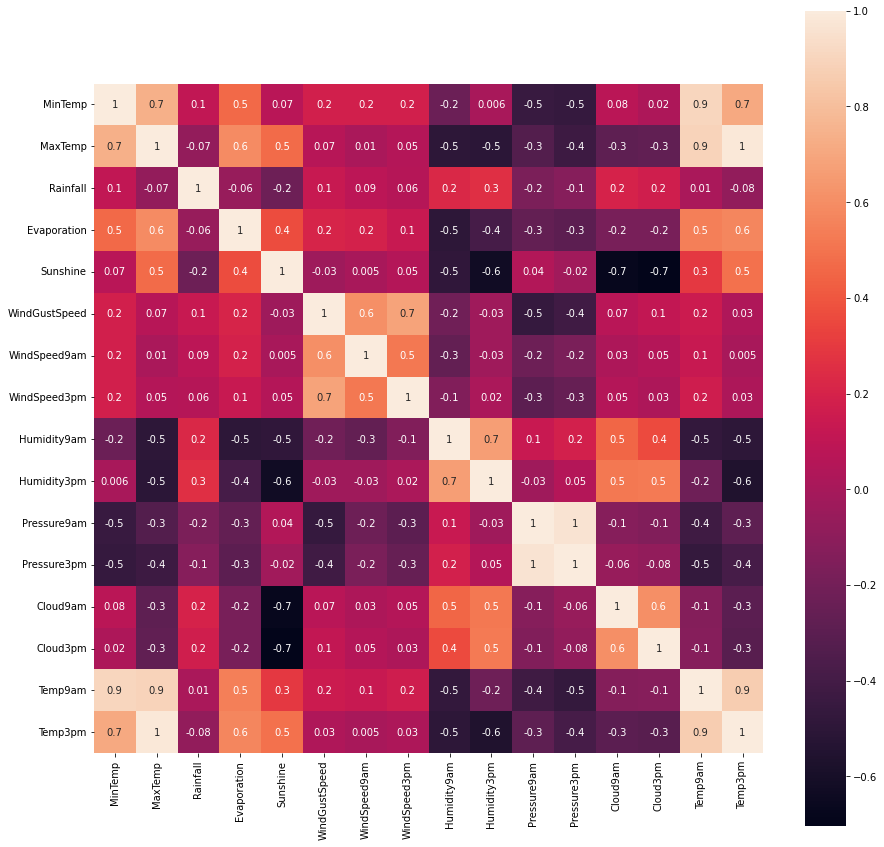

In [21]:
# Visualisasi korelasi
plt.figure(figsize=(15, 15))
sns.heatmap(korelasi, vmax=1, square=True, fmt='.1g', annot=True)
plt.show()

# Preprocessing

1. Handling Class Imbalance
2. Handling missing values
3. Handling outliers
4. Encode Data
5. Feature Scaling (Normalization)

## Handling Class Imbalance

In [22]:
# Hanlde class imbalance pada kolom target
tidak = df[df.RainTomorrow == 0]
ya = df[df.RainTomorrow == 1]
ya_oversampled = resample(ya, replace = True, n_samples = len(tidak), random_state=123)
oversampled = pd.concat([tidak, ya_oversampled])

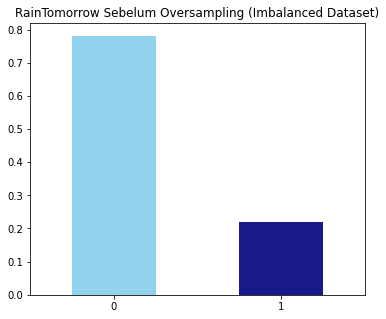

In [23]:
# Visualisasi sebelum handling class imbalance
fig = plt.figure(figsize = (6,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind = 'bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Sebelum Oversampling (Imbalanced Dataset)')
plt.show()

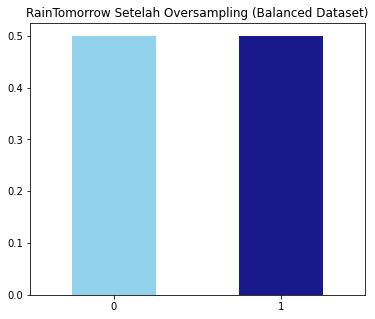

In [24]:
fig = plt.figure(figsize = (6,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind = 'bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Setelah Oversampling (Balanced Dataset)')
plt.show()

In [25]:
# Memasukkan nilai balanced RainTomorrow kedalam dataset
oversampled.reset_index(drop=True, inplace=True)
df = oversampled.copy()

## Handling Missing Values

### Handling Missing Values Data Kategorical

In [26]:
# Melihat jumlah nilai null / missing values pada data kategorical
df[categorical].isnull().sum()

Location           0
WindGustDir    16758
WindDir9am     15496
WindDir3pm      6994
RainToday       5047
dtype: int64

In [27]:
# Handling missing values pada data kategorical dengan menggunakan nilai modus/mode
for feature in categorical:
    if feature != 'Location':
        modus_kategori = df[feature].mode()
        df[feature].fillna(modus_kategori[0], inplace=True)
        
df[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### Handling Missing Values Data Numerical

In [28]:
# Melihat jumlah nilai null / missing values pada data numerical
df[numerical].isnull().sum()

MinTemp            1941
MaxTemp            1414
Rainfall           5047
Evaporation       98760
Sunshine         108376
WindGustSpeed     16616
WindSpeed9am       2659
WindSpeed3pm       4856
Humidity9am        4103
Humidity3pm        7031
Pressure9am       23097
Pressure3pm       23110
Cloud9am          84698
Cloud3pm          89036
Temp9am            2547
Temp3pm            5522
RainTomorrow          0
Tahun                 0
Bulan                 0
Hari                  0
dtype: int64

In [29]:
# Handling missing values pada data kategorical dengan menggunakan nilai mean/rata-rata
for feature in numerical:
    if feature != 'RainTomorrow' and feature != 'Tahun' and feature != 'Bulan' and feature != 'Hari':
        mean_numerical = int(df[feature].mean(skipna = True))
        df[feature].fillna(mean_numerical, inplace = True)
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainTomorrow     0
Tahun            0
Bulan            0
Hari             0
dtype: int64

## Handling Outliers

In [30]:
# Melihat deskripsi data untuk melihat perbandingan minmax kemungkinan outliers
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  227166.0  227166.0  227166.0     227166.0  227166.0       227166.0   
mean       13.0      22.0       4.0          5.0       6.0           42.0   
std         6.0       7.0      11.0          3.0       3.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      17.0       0.0          4.0       6.0           33.0   
50%        12.0      22.0       0.0          5.0       6.0           41.0   
75%        17.0      27.0       3.0          5.0       7.0           50.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      227166.0      227166.0     227166.0     227166.0     227166.0   
mean           15.0          19.0         72.0         58.0       1016.0   
std             9.0           9.0         18.0         21.0          7.0   
mi

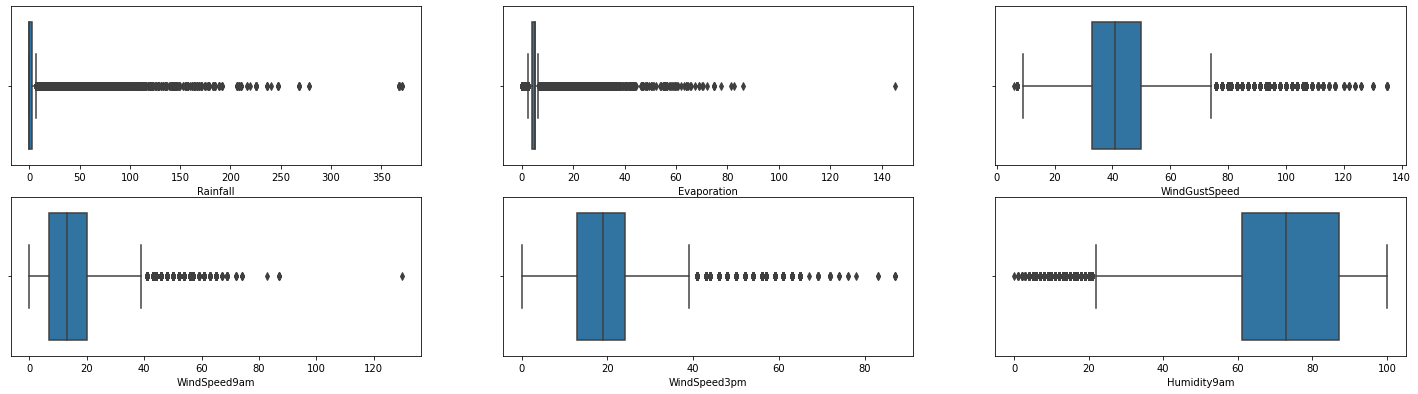

In [31]:
# Visualisasi check outliers
data_outliers = ['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am']
plt.figure(figsize = (25,45))
for i in enumerate(data_outliers):
    plt.subplot(13,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xlabel(i[1])

In [32]:
# Handle Outliers menggunakan IQR Method
for feature in data_outliers:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    Lower_fence = df[feature].quantile(0.25) - (IQR * 3)
    Upper_fence = df[feature].quantile(0.75) + (IQR * 3)
    print('Nilai outliers {column} adalah < {lowerboundary} or > {upperboundary}'.format(column = feature, lowerboundary = Lower_fence, upperboundary = Upper_fence))

Nilai outliers Rainfall adalah < -8.399999999999999 or > 11.2
Nilai outliers Evaporation adalah < 1.0 or > 8.0
Nilai outliers WindGustSpeed adalah < -18.0 or > 101.0
Nilai outliers WindSpeed9am adalah < -32.0 or > 59.0
Nilai outliers WindSpeed3pm adalah < -20.0 or > 57.0
Nilai outliers Humidity9am adalah < -17.0 or > 165.0


In [33]:
# Memasukkan nilai yang telah dihandle kedalam dataset
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

df['Rainfall'] = max_value(df, 'Rainfall', 11.2)
df['Evaporation'] = max_value(df, 'Evaporation', 8)
df['WindGustSpeed'] = max_value(df, 'WindGustSpeed', 101)
df['WindSpeed9am'] = max_value(df, 'WindSpeed9am', 59)
df['WindSpeed3pm'] = max_value(df, 'WindSpeed3pm', 57)
df['Humidity9am'] = max_value(df, 'Humidity9am', 165)

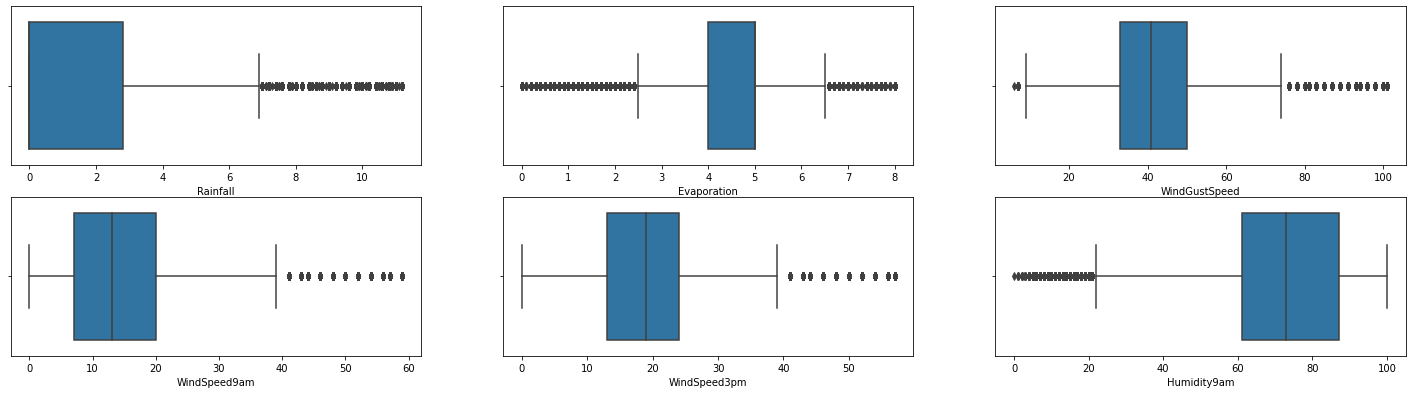

In [34]:
# Visualisasi pengecekan kembali nilai outliers yang sudah dihandle
data_outliers = ['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am']
plt.figure(figsize = (25,45))
for i in enumerate(data_outliers):
    plt.subplot(13,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xlabel(i[1])

## Encode Data

In [35]:
# Merubah semua data categorical menjadi numerical pada dataset
labelencoder = LabelEncoder()
df['Location'] = labelencoder.fit_transform(df['Location'])
df['WindGustDir'] = labelencoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = labelencoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = labelencoder.fit_transform(df['WindDir3pm'])
df['RainToday'] = labelencoder.fit_transform(df['RainToday'])
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int64
Tahun              int64
Bulan              int64
Hari               int64
dtype: object

## Feature Scalling

Menggunakan min-max normalization

In [36]:
# Normalisasi data dengan menggunakan min-max normalization
df = (df- df.min()) / (df.max() - df.min())
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Tahun,Bulan,Hari
0,0.041667,0.516509,0.523629,0.053571,0.625,0.413793,0.866667,0.400000,0.866667,0.933333,...,0.4800,0.888889,0.555556,0.508439,0.522073,0.0,0.0,0.1,1.0,0.000000
1,0.041667,0.375000,0.565217,0.000000,0.625,0.413793,0.933333,0.400000,0.400000,1.000000,...,0.4912,0.555556,0.555556,0.514768,0.570058,0.0,0.0,0.1,1.0,0.033333
2,0.041667,0.504717,0.576560,0.000000,0.625,0.413793,1.000000,0.421053,0.866667,1.000000,...,0.5056,0.555556,0.222222,0.594937,0.548944,0.0,0.0,0.1,1.0,0.066667
3,0.041667,0.417453,0.620038,0.000000,0.625,0.413793,0.266667,0.189474,0.600000,0.000000,...,0.5712,0.555556,0.555556,0.533755,0.612284,0.0,0.0,0.1,1.0,0.100000
4,0.041667,0.613208,0.701323,0.089286,0.625,0.413793,0.866667,0.368421,0.066667,0.466667,...,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.0,0.1,1.0,0.133333


In [37]:
df.to_csv("dataset hasil eksplorasi.csv", index = False)

In [38]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Tahun,Bulan,Hari
0,0.041667,0.516509,0.523629,0.053571,0.625,0.413793,0.866667,0.400000,0.866667,0.933333,...,0.4800,0.888889,0.555556,0.508439,0.522073,0.0,0.0,0.1,1.000000,0.000000
1,0.041667,0.375000,0.565217,0.000000,0.625,0.413793,0.933333,0.400000,0.400000,1.000000,...,0.4912,0.555556,0.555556,0.514768,0.570058,0.0,0.0,0.1,1.000000,0.033333
2,0.041667,0.504717,0.576560,0.000000,0.625,0.413793,1.000000,0.421053,0.866667,1.000000,...,0.5056,0.555556,0.222222,0.594937,0.548944,0.0,0.0,0.1,1.000000,0.066667
3,0.041667,0.417453,0.620038,0.000000,0.625,0.413793,0.266667,0.189474,0.600000,0.000000,...,0.5712,0.555556,0.555556,0.533755,0.612284,0.0,0.0,0.1,1.000000,0.100000
4,0.041667,0.613208,0.701323,0.089286,0.625,0.413793,0.866667,0.368421,0.066667,0.466667,...,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.0,0.1,1.000000,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227161,0.166667,0.768868,0.657845,0.535714,0.800,0.103448,0.533333,0.305263,0.533333,0.666667,...,0.5472,0.777778,0.888889,0.713080,0.583493,1.0,1.0,0.3,0.090909,0.700000
227162,0.104167,0.429245,0.374291,0.375000,0.625,0.413793,0.333333,0.663158,0.266667,0.266667,...,0.4240,0.111111,0.888889,0.426160,0.310940,1.0,1.0,0.6,0.727273,0.500000
227163,0.479167,0.162736,0.122873,0.000000,0.625,0.413793,0.266667,0.305263,0.400000,0.200000,...,0.5904,0.555556,0.555556,0.489451,0.120921,0.0,1.0,0.4,0.545455,0.533333
227164,0.666667,0.436321,0.434783,0.000000,0.525,0.013793,0.333333,0.484211,0.333333,0.333333,...,0.6752,0.888889,0.888889,0.443038,0.439539,0.0,1.0,0.4,0.454545,0.400000


# Splitting Data

In [37]:
# Splitting data nonlabel dan data label
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [38]:
# Splitting data train & data test dengan skema 80 : 20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 11, shuffle = True)

In [39]:
# Melihat jumlah variabel serta shape data train dan test
print("Jumlah variabel x_train :", len(x_train), "dan Jumlah Shape :", x_train.shape)
print("Jumlah variabel x_test :", len(x_test), "dan Jumlah Shape :", x_test.shape)
print("Jumlah variabel y_train :", len(y_train), "dan Jumlah Shape :", y_train.shape)
print("Jumlah variabel y_test :", len(y_test), "dan Jumlah Shape :", y_test.shape)

Jumlah variabel x_train : 181732 dan Jumlah Shape : (181732, 24)
Jumlah variabel x_test : 45434 dan Jumlah Shape : (45434, 24)
Jumlah variabel y_train : 181732 dan Jumlah Shape : (181732,)
Jumlah variabel y_test : 45434 dan Jumlah Shape : (45434,)


# Eksperimen 1

1. Modelling (TPOT)
2. Performance Evaluation

## Modelling

In [40]:
# Membuat modelling dengan menggunakan TPOT
model_tpot = TPOTClassifier(generations = 5, population_size = 20, cv = 5, n_jobs = -1, random_state = 11, verbosity = 2)
model_tpot.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8388396302021871

Generation 2 - Current best internal CV score: 0.8412167426995143

Generation 3 - Current best internal CV score: 0.8412167426995143

Generation 4 - Current best internal CV score: 0.8554795023119711

Generation 5 - Current best internal CV score: 0.8597330369795891

Best pipeline: RandomForestClassifier(SelectFwe(input_matrix, alpha=0.022), bootstrap=False, criterion=gini, max_features=0.05, min_samples_leaf=11, min_samples_split=5, n_estimators=100)


TPOTClassifier(generations=5, n_jobs=-1, population_size=20, random_state=11,
               verbosity=2)

In [41]:
# Melakukan testing terhadap data test
preds_tpot = model_tpot.predict(x_test)

## Performance Evaluation

In [42]:
# Melihat score data training dan test
print('Training set score: {:.4f}'.format(model_tpot.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model_tpot.score(x_test, y_test)))

Training set score: 0.9229
Test set score: 0.8763


In [43]:
# Hasil klasifikasi data
print(classification_report(y_test,preds_tpot))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87     22467
         1.0       0.86      0.90      0.88     22967

    accuracy                           0.88     45434
   macro avg       0.88      0.88      0.88     45434
weighted avg       0.88      0.88      0.88     45434



In [44]:
# Hasil confusion matrix
cm_tpot = confusion_matrix(y_test, preds_tpot)
print('\nTrue Positives(TP) = ', cm_tpot[0,0])
print('\nTrue Negatives(TN) = ', cm_tpot[1,1])
print('\nFalse Positives(FP) = ', cm_tpot[0,1])
print('\nFalse Negatives(FN) = ', cm_tpot[1,0])


True Positives(TP) =  19232

True Negatives(TN) =  20583

False Positives(FP) =  3235

False Negatives(FN) =  2384


In [45]:
# Melihat hasil akhir akurasi, f1 score, presisi, dan recall
print("Akurasi Eksperimen 1 : {} %".format(round(accuracy_score(y_test,preds_tpot)*100,3)))
print("F1 Score Eksperimen 1 : {} %".format(round(f1_score(y_test,preds_tpot, average='weighted')*100,3)))
print("Precision Eksperimen 1 : {} %".format(round(precision_score(y_test,preds_tpot, average='weighted')*100,3)))
print("Recall Eksperimen 1 : {} %".format(round(recall_score(y_test,preds_tpot, average='weighted')*100,3)))

Akurasi : 87.633 %
F1 Score : 87.626 %
Precision : 87.68 %
Recall: 87.633 %


# Eksperimen 2

1. Modelling (TPOT)
2. Performance Evaluation

## Modelling

In [46]:
# Membuat modelling dengan menggunakan TPOT
model_tpot2 = TPOTClassifier(generations = 10, population_size = 20, cv = 5, n_jobs = -1, random_state = 11, verbosity = 2)
model_tpot2.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8388396302021871

Generation 2 - Current best internal CV score: 0.8526841913766591

Generation 3 - Current best internal CV score: 0.8837023942828466

Generation 4 - Current best internal CV score: 0.8837023942828466

Generation 5 - Current best internal CV score: 0.8837023942828466

Generation 6 - Current best internal CV score: 0.8837023942828466

Generation 7 - Current best internal CV score: 0.8911529174490026

Generation 8 - Current best internal CV score: 0.9305736032546672

Generation 9 - Current best internal CV score: 0.9305736032546672

Generation 10 - Current best internal CV score: 0.9305736032546672

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.05, min_samples_leaf=2, min_samples_split=7, n_estimators=100)


TPOTClassifier(generations=10, n_jobs=-1, population_size=20, random_state=11,
               verbosity=2)

In [47]:
# Melakukan testing terhadap data test
preds_tpot2 = model_tpot2.predict(x_test)

## Performance Evaluation

In [48]:
# Melihat score data training dan test
print('Training set score: {:.4f}'.format(model_tpot2.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model_tpot2.score(x_test, y_test)))

Training set score: 0.9978
Test set score: 0.9471


In [49]:
# Hasil klasifikasi data
print(classification_report(y_test,preds_tpot2))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95     22467
         1.0       0.93      0.96      0.95     22967

    accuracy                           0.95     45434
   macro avg       0.95      0.95      0.95     45434
weighted avg       0.95      0.95      0.95     45434



In [50]:
# Hasil confusion matrix
cm_tpot2 = confusion_matrix(y_test, preds_tpot2)
print('\nTrue Positives(TP) = ', cm_tpot2[0,0])
print('\nTrue Negatives(TN) = ', cm_tpot2[1,1])
print('\nFalse Positives(FP) = ', cm_tpot2[0,1])
print('\nFalse Negatives(FN) = ', cm_tpot2[1,0])


True Positives(TP) =  20890

True Negatives(TN) =  22142

False Positives(FP) =  1577

False Negatives(FN) =  825


In [51]:
# Melihat hasil akhir akurasi, f1 score, presisi, dan recall
print("Akurasi Eksperimen 2 : {} %".format(round(accuracy_score(y_test,preds_tpot2)*100,3)))
print("F1 Score Eksperimen 2 : {} %".format(round(f1_score(y_test,preds_tpot2, average='weighted')*100,3)))
print("Precision Eksperimen 2 : {} %".format(round(precision_score(y_test,preds_tpot2, average='weighted')*100,3)))
print("Recall Eksperimen 2 : {} %".format(round(recall_score(y_test,preds_tpot2, average='weighted')*100,3)))

Akurasi : 94.713 %
F1 Score : 94.711 %
Precision : 94.76 %
Recall: 94.713 %
